In [18]:
import os
os.chdir("E:/Python1")

In [19]:
import pandas as pd
df1 = pd.read_csv("passenger.csv",sep=",",header=[0])
df1.head(n=2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Continent,Bloodpressure,Swiming,Height(cm),Weight(kg)
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,1,169,73
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,1,176,84


Number of Null value:---> PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age              177
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Continent          0
Bloodpressure      0
Swiming            0
Height(cm)         0
Weight(kg)         0
dtype: int64


<AxesSubplot:>

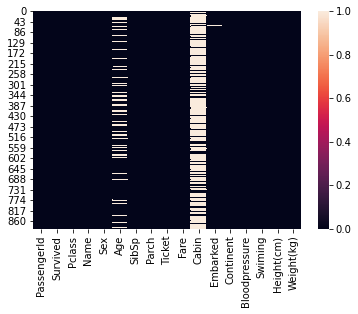

In [20]:
print("Number of Null value:--->",df1.isna().sum())
import seaborn as sb
sb.heatmap(df1.isnull())

In [21]:
df1["PassengerId"].duplicated().describe()

count       891
unique        1
top       False
freq        891
Name: PassengerId, dtype: object

In [22]:
model_data = df1.drop(["Name","Age","Ticket","Cabin"],axis=1)
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    object 
 4   SibSp          891 non-null    int64  
 5   Parch          891 non-null    int64  
 6   Fare           891 non-null    float64
 7   Embarked       889 non-null    object 
 8   Continent      891 non-null    int64  
 9   Bloodpressure  891 non-null    int64  
 10  Swiming        891 non-null    int64  
 11  Height(cm)     891 non-null    int64  
 12  Weight(kg)     891 non-null    int64  
dtypes: float64(1), int64(10), object(2)
memory usage: 90.6+ KB


In [23]:
model_data["Embarked"] = model_data["Embarked"].fillna("Embarked_N")

In [24]:
model_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
SibSp            0
Parch            0
Fare             0
Embarked         0
Continent        0
Bloodpressure    0
Swiming          0
Height(cm)       0
Weight(kg)       0
dtype: int64

In [25]:
model_data.Pclass.replace([1, 2, 3], ["Pclass1","Pclass2", "Pclass3"], inplace=True)
model_data.Sex.replace(["male","female"], ["Sex1","Sex0"], inplace=True)
model_data.SibSp.replace([0, 1, 2, 3, 4, 5, 8], ["SibSp0","SibSp1", "SibSp2", "SibSp3","SibSp4","SibSp5","SibSp8"], inplace=True)
model_data.Parch.replace([0, 1, 2, 3, 4, 5, 6], ["Parch0","Parch1", "Parch2", "Parch3","Parch4","Parch5","Parch6"], inplace=True)
model_data.Embarked.replace(["C","Q","S"], ["Embarked_C","Embarked_Q","Embarked_S"], inplace=True)
model_data.Continent.replace([1,2,3,4,5], ["Continent1","Continent2","Continent3","Continent4","Continent5"], inplace=True)
model_data.Swiming.replace([0,1], ["Swiming0","Swiming1"], inplace=True)

In [26]:
Pclass_dummy = pd.get_dummies(model_data["Pclass"])
Sex_dummy = pd.get_dummies(model_data["Sex"])
SibSp_dummy = pd.get_dummies(model_data["SibSp"])
Parch_dummy = pd.get_dummies(model_data["Parch"])
Embarked_dummy = pd.get_dummies(model_data["Embarked"])
Continent_dummy = pd.get_dummies(model_data["Continent"])
Swiming_dummy = pd.get_dummies(model_data["Swiming"])

In [27]:
model_data1 = pd.concat((model_data.drop(['PassengerId',"Pclass","Sex","SibSp","Parch","Embarked","Continent","Swiming"],axis=1),Pclass_dummy, Sex_dummy,SibSp_dummy,Parch_dummy,Embarked_dummy,Continent_dummy,Swiming_dummy),axis=1)

In [28]:
model_data1.columns

Index(['Survived', 'Fare', 'Bloodpressure', 'Height(cm)', 'Weight(kg)',
       'Pclass1', 'Pclass2', 'Pclass3', 'Sex0', 'Sex1', 'SibSp0', 'SibSp1',
       'SibSp2', 'SibSp3', 'SibSp4', 'SibSp5', 'SibSp8', 'Parch0', 'Parch1',
       'Parch2', 'Parch3', 'Parch4', 'Parch5', 'Parch6', 'Embarked_C',
       'Embarked_N', 'Embarked_Q', 'Embarked_S', 'Continent1', 'Continent2',
       'Continent3', 'Continent4', 'Continent5', 'Swiming0', 'Swiming1'],
      dtype='object')

In [29]:
model_data1.head(n=10)

,Survived,Fare,Bloodpressure,Height(cm),Weight(kg),Pclass1,Pclass2,Pclass3,Sex0,Sex1,...,Embarked_N,Embarked_Q,Embarked_S,Continent1,Continent2,Continent3,Continent4,Continent5,Swiming0,Swiming1
0,0,7.2500,0,169,73,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,1,71.2833,1,176,84,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,1,7.9250,1,181,95,0,0,1,1,0,...,0,0,1,0,0,0,1,0,0,1
3,1,53.1000,1,157,60,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1
4,0,8.0500,0,197,83,0,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5,0,8.4583,1,195,82,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
6,0,51.8625,1,163,91,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,1
7,0,21.0750,1,181,61,0,0,1,0,1,...,0,0,1,0,0,0,1,0,1,0
8,1,11.1333,0,191,63,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,1
9,1,30.0708,0,160,91,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [30]:
model_data2= model_data1.drop(['Pclass3','Sex1','SibSp8','Parch6','Embarked_N','Continent5','Swiming1'],axis=1)
model_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int64  
 1   Fare           891 non-null    float64
 2   Bloodpressure  891 non-null    int64  
 3   Height(cm)     891 non-null    int64  
 4   Weight(kg)     891 non-null    int64  
 5   Pclass1        891 non-null    uint8  
 6   Pclass2        891 non-null    uint8  
 7   Sex0           891 non-null    uint8  
 8   SibSp0         891 non-null    uint8  
 9   SibSp1         891 non-null    uint8  
 10  SibSp2         891 non-null    uint8  
 11  SibSp3         891 non-null    uint8  
 12  SibSp4         891 non-null    uint8  
 13  SibSp5         891 non-null    uint8  
 14  Parch0         891 non-null    uint8  
 15  Parch1         891 non-null    uint8  
 16  Parch2         891 non-null    uint8  
 17  Parch3         891 non-null    uint8  
 18  Parch4    

In [31]:
# Seperate the dataframe into x and y data
x = model_data2.drop("Survived",axis=1).values
y = model_data2["Survived"].values

In [32]:
print("Shape of datastructure x ", x.shape)
print("Shape of datastructure y ", y.shape)

Shape of datastructure x  (891, 27)
Shape of datastructure y  (891,)


In [33]:
# Split the dataset into 70% training and 30% test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Decision Tree

In [17]:
# Decision Tree
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
print("Decision Tree traing model score:--->", dt_clf.score(x_train,y_train))
print("Decision Tree testing model score:--->", dt_clf.score(x_test,y_test))

Decision Tree traing model score:---> 1.0
Decision Tree testing model score:---> 0.7238805970149254


In [64]:
y_pred_train = dt_clf.predict(x_train)
print("Predicted value for train data",y_pred_train)
print("Number of predicted value in training dataset:--->",len(y_pred_train))

Predicted value for train data [1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1
 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0
 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 

In [65]:
y_pred_test = dt_clf.predict(x_test)
print("Predicted value of test data:--->",y_pred_test)
print("Number of predicted value for test dataset:--->",len(y_pred_test))

Predicted value of test data:---> [0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0
 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1
 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1
 1 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1
 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1
 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0]
Number of predicted value for test dataset:---> 268


In [66]:
from sklearn.metrics import accuracy_score
print("Decision Tree traing model accuracy score:--->", accuracy_score(y_train,y_pred_train))
print("Decision Tree testing model accuracy score:--->", accuracy_score(y_test,y_pred_test))

Decision Tree traing model accuracy score:---> 1.0
Decision Tree testing model accuracy score:---> 0.7238805970149254


In [67]:
pd.crosstab(y_test,y_pred_test)

col_0,0,1
row_0,,
0,124,44
1,30,70


In [68]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_test))
dt_cm = confusion_matrix(y_test,y_pred_test)

[[124  44]
 [ 30  70]]


Text(24.0, 0.5, 'Truth or Actual Value')

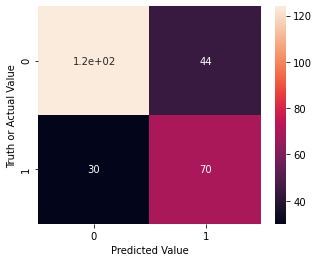

In [69]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(dt_cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

In [70]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [71]:
dt_probs = dt_clf.predict_proba(x_test)  # Predicted probability
print(dt_probs)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 

In [72]:
dt_probs = dt_probs[:,1] #Probability for the positive outome is kept
print(dt_probs)

[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0.]


In [73]:
import numpy as np
y_predict_th3 = np.where(dt_clf.predict_proba(x_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(dt_clf.predict_proba(x_test)[:,1]>0.4,1,0) # Threshold is 0.4

In [74]:
pd.crosstab(y_test,y_predict_th3)

col_0,0,1
row_0,,
0,124,44
1,30,70


In [75]:
pd.crosstab(y_test,y_predict_th4)

col_0,0,1
row_0,,
0,124,44
1,30,70


In [82]:
def predict_threshold (dt_clf,x_test,thresholes):
    import numpy as np
    return np.where(dt_clf.predict_proba(x_test)[:,1]>=thresholes,1,0) # Threshold is 0.3

In [83]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(dt_clf,x_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[  0 168]
 [  0 100]]
Threshold : 0.1
[[124  44]
 [ 30  70]]
Threshold : 0.2
[[124  44]
 [ 30  70]]
Threshold : 0.30000000000000004
[[124  44]
 [ 30  70]]
Threshold : 0.4
[[124  44]
 [ 30  70]]
Threshold : 0.5
[[124  44]
 [ 30  70]]
Threshold : 0.6000000000000001
[[124  44]
 [ 30  70]]
Threshold : 0.7000000000000001
[[124  44]
 [ 30  70]]
Threshold : 0.8
[[124  44]
 [ 30  70]]
Threshold : 0.9
[[124  44]
 [ 30  70]]


In [77]:
# Display the AUROC scores- Area under the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
dt_auc = roc_auc_score(y_test,dt_probs)
print(dt_auc)
print("Decision Tree: AUROC = %.3f" %(dt_auc))

0.7370238095238095
Decision Tree: AUROC = 0.737


In [78]:
dt_ytrain_pred = dt_clf.predict_proba(x_train)
print("dt train roc-auc: {}".format(roc_auc_score(y_train,dt_ytrain_pred[:,1])))
dt_ytest_pred = dt_clf.predict_proba(x_test)
print("dt test roc-auc: {}".format(roc_auc_score(y_test,dt_ytest_pred[:,1])))

dt train roc-auc: 1.0
dt test roc-auc: 0.7370238095238095


In [81]:
# Calculate the ROC curve
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

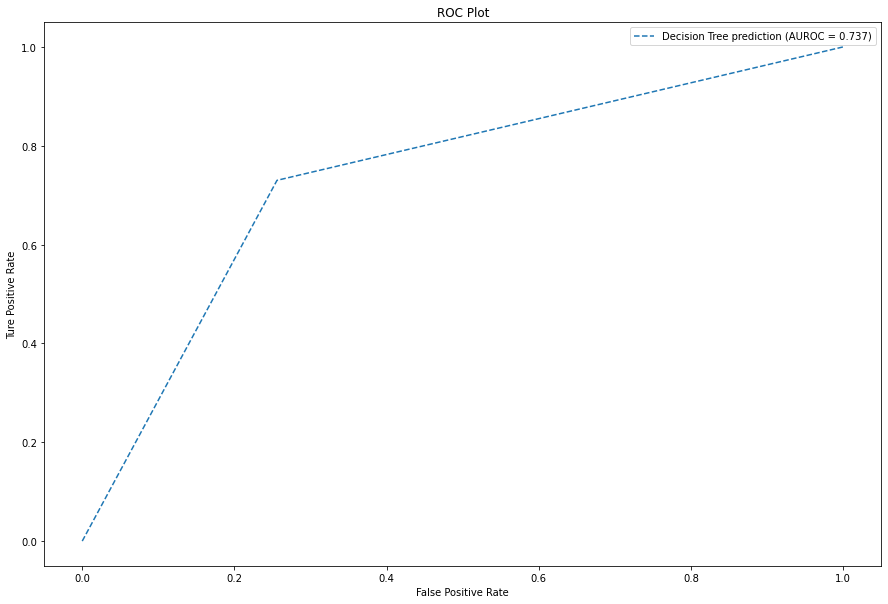

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(dt_fpr,dt_tpr, linestyle = '--', label='Decision Tree prediction (AUROC = %0.3f)' %dt_auc)
#Title
plt.title("ROC Plot")

# Axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')

# Show Legend
plt.legend()
plt.show()

# Random Forest

In [22]:
from sklearn import ensemble
#help(ensemble.RandomForestClassifier)

In [23]:
import sklearn.ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [24]:
print("Model score on training data is :--->",rf_clf.score(x_train, y_train))
print("Model score on testing data is :--->",rf_clf.score(x_test, y_test))

Model score on training data is :---> 1.0
Model score on testing data is :---> 0.7835820895522388


In [25]:
rf_y_pred_train = rf_clf.predict(x_train)
print("Predicted value for train data",rf_y_pred_train)
print("Number of predicted value in training dataset:--->",len(rf_y_pred_train))

Predicted value for train data [1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1
 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0
 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 

In [26]:
rf_y_pred_test = rf_clf.predict(x_test)
print("Predicted value of test data:--->",rf_y_pred_test)
print("Number of predicted value for test dataset:--->",len(rf_y_pred_test))

Predicted value of test data:---> [0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 1
 1 0 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0]
Number of predicted value for test dataset:---> 268


In [27]:
from sklearn.metrics import accuracy_score
print("Random Forest traing model accuracy score:--->", accuracy_score(y_train,rf_y_pred_train))
print("Random Forest testing model accuracy score:--->", accuracy_score(y_test,rf_y_pred_test))

Random Forest traing model accuracy score:---> 1.0
Random Forest testing model accuracy score:---> 0.7835820895522388


In [41]:
# Random Forest
rf_ytrain_pred = rf_clf.predict_proba(x_train)
print("rf train roc-auc: {}".format(roc_auc_score(y_train,rf_ytrain_pred[:,1])))
rf_ytest_pred = rf_clf.predict_proba(x_test)
print("rf test roc-auc: {}".format(roc_auc_score(y_test,rf_ytest_pred[:,1])))

rf train roc-auc: 0.9999999999999999
rf test roc-auc: 0.8483928571428572


# Build Gradient Boosting Classifier

In [42]:
from sklearn import ensemble
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [43]:
print("Model score on training data is ",gb_clf.score(x_train, y_train))
print("Model score on testing data is ",gb_clf.score(x_test, y_test))

Model score on training data is  0.8956661316211878
Model score on testing data is  0.7910447761194029


In [44]:
# Gradient Boosting
gb_ytrain_pred = gb_clf.predict_proba(x_train)
print("gb train roc-auc: {}".format(roc_auc_score(y_train,gb_ytrain_pred[:,1])))
gb_ytest_pred = gb_clf.predict_proba(x_test)
print("gb test roc-auc: {}".format(roc_auc_score(y_test,gb_ytest_pred[:,1])))

gb train roc-auc: 0.9602015140669401
gb test roc-auc: 0.8423214285714286


# Build a Naive Bayes Classifier

In [46]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)

GaussianNB()

In [47]:
print("Model score on training data is ",nb_clf.score(x_train, y_train))
print("Model score on testing data is ",nb_clf.score(x_test, y_test))

Model score on training data is  0.42375601926163725
Model score on testing data is  0.41044776119402987


In [48]:
# Naive Bayes
nb_ytrain_pred = nb_clf.predict_proba(x_train)
print("nb train roc-auc: {}".format(roc_auc_score(y_train,nb_ytrain_pred[:,1])))
nb_ytest_pred = nb_clf.predict_proba(x_test)
print("nb test roc-auc: {}".format(roc_auc_score(y_test,nb_ytest_pred[:,1])))

nb train roc-auc: 0.804483633760656
nb test roc-auc: 0.8183333333333334


# Biuld a K-Nearest Neighbor Classifier

In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [50]:
print("Model score on training data is ",knn_clf.score(x_train, y_train))
print("Model score on testing data is ",knn_clf.score(x_test, y_test))

Model score on training data is  0.7881219903691814
Model score on testing data is  0.6194029850746269


In [51]:
# K-Nearest Neighbor
knn_ytrain_pred = knn_clf.predict_proba(x_train)
print("knn train roc-auc: {}".format(roc_auc_score(y_train,knn_ytrain_pred[:,1])))
knn_ytest_pred = knn_clf.predict_proba(x_test)
print("knn test roc-auc: {}".format(roc_auc_score(y_test,knn_ytest_pred[:,1])))

knn train roc-auc: 0.8560226459295894
knn test roc-auc: 0.6189285714285715


# Build Logistic Regression Classifier

In [34]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train,y_train)

C:\Users\MY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
print("Model score on training data is ",lr_clf.score(x_train, y_train))
print("Model score on testing data is ",lr_clf.score(x_test, y_test))

Model score on training data is  0.8057784911717496
Model score on testing data is  0.7835820895522388


In [36]:
lr_y_pred_train = lr_clf.predict(x_train)
print("Predicted value for train data",lr_y_pred_train)
print("Number of predicted value in training dataset:--->",len(lr_y_pred_train))

Predicted value for train data [0 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1
 1 0 1 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1
 0 1 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 

In [37]:
lr_y_pred_test = lr_clf.predict(x_test)
print("Predicted value of test data:--->",lr_y_pred_test)
print("Number of predicted value for test dataset:--->",len(lr_y_pred_test))

Predicted value of test data:---> [0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 0 0 1 0]
Number of predicted value for test dataset:---> 268


In [38]:
from sklearn.metrics import accuracy_score
print("Decision Tree traing model accuracy score:--->", accuracy_score(y_train,lr_y_pred_train))
print("Decision Tree testing model accuracy score:--->", accuracy_score(y_test,lr_y_pred_test))

Decision Tree traing model accuracy score:---> 0.8057784911717496
Decision Tree testing model accuracy score:---> 0.7835820895522388


In [39]:
pd.crosstab(y_train,lr_y_pred_train)

col_0,0,1
row_0,,
0,336,45
1,76,166


In [40]:
pd.crosstab(y_test,lr_y_pred_test)

col_0,0,1
row_0,,
0,138,30
1,28,72


In [41]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,lr_y_pred_test))

[[138  30]
 [ 28  72]]


Text(24.0, 0.5, 'Truth or Actual Value')

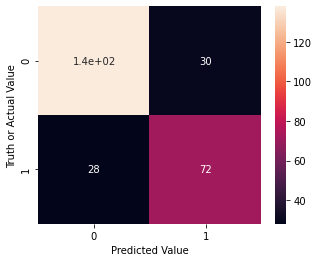

In [42]:
lr_cm = confusion_matrix(y_test,lr_y_pred_test)
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize = (5,4))
sn.heatmap(lr_cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

In [43]:
lr_probs = lr_clf.predict_proba(x_test)  # Predicted probability for both -ve and +ve outcome
print(lr_probs)

[[0.8038416  0.1961584 ]
 [0.87185518 0.12814482]
 [0.88029025 0.11970975]
 [0.06240603 0.93759397]
 [0.34015577 0.65984423]
 [0.70540711 0.29459289]
 [0.14453777 0.85546223]
 [0.11110885 0.88889115]
 [0.56132173 0.43867827]
 [0.37655433 0.62344567]
 [0.89811317 0.10188683]
 [0.26661465 0.73338535]
 [0.86739727 0.13260273]
 [0.30871768 0.69128232]
 [0.10091313 0.89908687]
 [0.454285   0.545715  ]
 [0.89435315 0.10564685]
 [0.62783446 0.37216554]
 [0.89560119 0.10439881]
 [0.74250792 0.25749208]
 [0.720421   0.279579  ]
 [0.12198943 0.87801057]
 [0.77949135 0.22050865]
 [0.66512173 0.33487827]
 [0.43176644 0.56823356]
 [0.05447543 0.94552457]
 [0.89223284 0.10776716]
 [0.44436644 0.55563356]
 [0.12036629 0.87963371]
 [0.76332323 0.23667677]
 [0.84340421 0.15659579]
 [0.20019869 0.79980131]
 [0.93010566 0.06989434]
 [0.6787578  0.3212422 ]
 [0.87088082 0.12911918]
 [0.45337249 0.54662751]
 [0.90215339 0.09784661]
 [0.83776067 0.16223933]
 [0.75741084 0.24258916]
 [0.78001469 0.21998531]


In [44]:
lr_probs = lr_probs[:,1] #Probability for the positive outome is kept
print(lr_probs)

[0.1961584  0.12814482 0.11970975 0.93759397 0.65984423 0.29459289
 0.85546223 0.88889115 0.43867827 0.62344567 0.10188683 0.73338535
 0.13260273 0.69128232 0.89908687 0.545715   0.10564685 0.37216554
 0.10439881 0.25749208 0.279579   0.87801057 0.22050865 0.33487827
 0.56823356 0.94552457 0.10776716 0.55563356 0.87963371 0.23667677
 0.15659579 0.79980131 0.06989434 0.3212422  0.12911918 0.54662751
 0.09784661 0.16223933 0.24258916 0.21998531 0.66595829 0.10851706
 0.06668396 0.06656774 0.89126211 0.08576025 0.08138369 0.89522627
 0.21395773 0.53826509 0.42118759 0.61800476 0.8930754  0.09310973
 0.45318294 0.18158154 0.38309147 0.21188829 0.02394995 0.13396607
 0.12174967 0.53527835 0.93184551 0.48787471 0.55741102 0.17927836
 0.82029431 0.43790818 0.89218716 0.85269709 0.77775406 0.39254846
 0.51431548 0.09178237 0.11894605 0.41284582 0.16325241 0.35462391
 0.08277709 0.35048407 0.15975149 0.21191118 0.87540138 0.10893151
 0.23808235 0.87047456 0.94527039 0.47134704 0.7591843  0.5245

In [45]:
import numpy as np
lr_y_predict_th3 = np.where(lr_clf.predict_proba(x_test)[:,1]>0.3,1,0) # Threshold is 0.3
lr_y_predict_th4 = np.where(lr_clf.predict_proba(x_test)[:,1]>0.4,1,0) # Threshold is 0.4

In [46]:
lr_y_predict_th3

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1])

In [47]:
pd.crosstab(y_test,lr_y_predict_th3)

col_0,0,1
row_0,,
0,116,52
1,17,83


In [48]:
pd.crosstab(y_test,lr_y_predict_th4)

col_0,0,1
row_0,,
0,133,35
1,21,79


In [49]:
def predict_threshold (lr_clf,x_test,thresholds):
    import numpy as np
    return np.where(lr_clf.predict_proba(x_test)[:,1]>thresholds,1,0)

In [50]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    lr_y_predict = predict_threshold(lr_clf,x_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,lr_y_predict))

Threshold : 0.0
[[  0 168]
 [  0 100]]
Threshold : 0.1
[[ 33 135]
 [  4  96]]
Threshold : 0.2
[[94 74]
 [12 88]]
Threshold : 0.30000000000000004
[[116  52]
 [ 17  83]]
Threshold : 0.4
[[133  35]
 [ 21  79]]
Threshold : 0.5
[[138  30]
 [ 28  72]]
Threshold : 0.6000000000000001
[[155  13]
 [ 36  64]]
Threshold : 0.7000000000000001
[[163   5]
 [ 49  51]]
Threshold : 0.8
[[165   3]
 [ 65  35]]
Threshold : 0.9
[[168   0]
 [ 87  13]]


In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
tpr,fpr,thresholds = roc_curve(y_test,lr_clf.predict_proba(x_test)[:,1])
thresholds

array([1.96746131, 0.96746131, 0.87801057, 0.87540138, 0.83198774,
       0.82784423, 0.82029431, 0.81310359, 0.74229716, 0.73948237,
       0.7369537 , 0.73350894, 0.7060051 , 0.69844658, 0.68475549,
       0.68217959, 0.68003844, 0.67643739, 0.6760309 , 0.67150617,
       0.64394978, 0.63917134, 0.63186411, 0.62740445, 0.61800476,
       0.56823356, 0.55563356, 0.5509358 , 0.54662751, 0.53527835,
       0.53378746, 0.51431548, 0.50776496, 0.50286817, 0.50285728,
       0.48787471, 0.47134704, 0.45589719, 0.43867827, 0.43790818,
       0.42118759, 0.41932439, 0.39254846, 0.33487827, 0.32944748,
       0.32579387, 0.31846621, 0.31020258, 0.29459289, 0.2631948 ,
       0.25749208, 0.23667677, 0.23410264, 0.21285739, 0.21191118,
       0.21188829, 0.2094154 , 0.19527559, 0.18321864, 0.17851294,
       0.17247146, 0.14846217, 0.14173148, 0.1342477 , 0.13396607,
       0.11970975, 0.11969872, 0.11594849, 0.11488606, 0.10564685,
       0.1048137 , 0.10423505, 0.10296109, 0.09784661, 0.09742

In [52]:
lr_clf.predict(x_test)
y_test

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0], dtype=int64)

In [54]:
print(type(y_test))
print(type(lr_clf.predict(x_test)))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [65]:
from sklearn.metrics import classification_report
target_names = ['class 0','class 1']
print(classification_report(y_test,lr_y_pred_test,target_names = target_names))

              precision    recall  f1-score   support

     class 0       0.83      0.82      0.83       168
     class 1       0.71      0.72      0.71       100

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



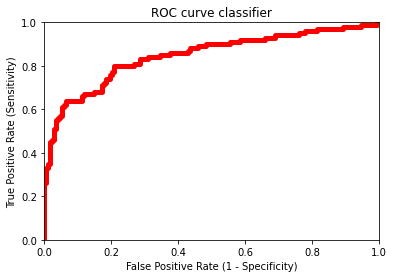

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, lr_clf.predict_proba(x_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

In [57]:
# Logistic Regression
lr_ytrain_pred = lr_clf.predict_proba(x_train)
print("Logistic regression train roc-auc score: {}".format(roc_auc_score(y_train,lr_ytrain_pred[:,1])))
lr_ytest_pred = lr_clf.predict_proba(x_test)
print("Logistic regression test roc-auc score: {}".format(roc_auc_score(y_test,lr_ytest_pred[:,1])))

Logistic regression train roc-auc score: 0.85029608902193
Logistic regression test roc-auc score: 0.848154761904762


In [58]:
# To predict from a new dataset with optimize threshold
lr_probs1 = lr_clf.predict_proba(pd.read_csv("E:/python1/new_data.csv",sep = ",",header=None))  # Predicted probability for both -ve and +ve outcome
print(lr_probs1)

[[9.99998876e-01 1.12405942e-06]]


In [59]:
lr_probs1 = lr_probs1[:,1] #Probability for the positive outome is kept
print(lr_probs1)

[1.12405942e-06]


In [60]:
import numpy as np
lr_y_predict_new_data = np.where(lr_clf.predict_proba(pd.read_csv("E:/python1/new_data.csv",sep = ",",header=None))[:,1]>0.0000000000001,1,0) # Threshold is 0.3
lr_y_predict_new_data

array([1])

In [62]:
lr_clf.predict([[26,0,1609,86,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1]])

array([0], dtype=int64)

# Calculating Statistical parameter for Logistic regression

In [56]:
from statsmodels.formula.api import logit
logistic_model = logit('Survived ~ Fare + Bloodpressure' ,data = model_data1)
result = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.626867
         Iterations 6


In [57]:
from statsmodels.formula.api import logit
logistic_model = logit('Survived ~ Fare + Bloodpressure' ,data = model_data1)
result = logistic_model.fit()

Optimization terminated successfully.
         Current function value: 0.626867
         Iterations 6


In [58]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Tue, 21 Dec 2021   Pseudo R-squ.:                 0.05863
Time:                        11:28:55   Log-Likelihood:                -558.54
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 7.788e-16
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8882      0.121     -7.326      0.000      -1.126      -0.651
Fare              0.0153      0.002      6.818      0.000       0.011       0.020
Bloodpressure    -0.1011      0.144     -0.701      0.483      -0.384       0.182
=================================================================================
"""

In [59]:
result.conf_int()

,0,1
Intercept,-1.125752,-0.650551
Fare,0.010890,0.019677
Bloodpressure,-0.383745,0.181517


In [60]:
result.params

Intercept       -0.888151
Fare             0.015283
Bloodpressure   -0.101114
dtype: float64

# Build a Support Vector machinne(SVM) classifier

In [61]:
from sklearn.svm import SVC
#sv_clf = SVC(probability = True, kernel = 'linear')
sv_clf = SVC(probability = True)
sv_clf.fit(x_train,y_train)

SVC(probability=True)

In [62]:
print("Model score on training data is ",sv_clf.score(x_train, y_train))
print("Model score on testing data is ",sv_clf.score(x_test, y_test))

Model score on training data is  0.6500802568218299
Model score on testing data is  0.7052238805970149


In [63]:
# Support Vector machinne
sv_ytrain_pred = sv_clf.predict_proba(x_train)
print("sv train roc-auc: {}".format(roc_auc_score(y_train,sv_ytrain_pred[:,1])))
sv_ytest_pred = sv_clf.predict_proba(x_test)
print("sv test roc-auc: {}".format(roc_auc_score(y_test,sv_ytest_pred[:,1])))

sv train roc-auc: 0.6917637361445521
sv test roc-auc: 0.7307142857142856


# Prediction Probabilities

In [64]:
rf_probs = rf_clf.predict_proba(x_test)
gb_probs = gb_clf.predict_proba(x_test)
nb_probs = nb_clf.predict_proba(x_test)
knn_probs = knn_clf.predict_proba(x_test)
lr_probs = lr_clf.predict_proba(x_test)
sv_probs = sv_clf.predict_proba(x_test)

In [65]:
print(rf_probs)
print(gb_probs)
print(nb_probs)
print(knn_probs)
print(lr_probs)
print(sv_probs)

[[0.7  0.3 ]
 [0.94 0.06]
 [0.91 0.09]
 [0.08 0.92]
 [0.21 0.79]
 [0.59 0.41]
 [0.06 0.94]
 [0.17 0.83]
 [0.39 0.61]
 [0.52 0.48]
 [0.62 0.38]
 [0.22 0.78]
 [0.82 0.18]
 [0.35 0.65]
 [0.07 0.93]
 [0.51 0.49]
 [0.84 0.16]
 [0.31 0.69]
 [0.87 0.13]
 [0.64 0.36]
 [0.87 0.13]
 [0.18 0.82]
 [0.76 0.24]
 [0.81 0.19]
 [0.35 0.65]
 [0.13 0.87]
 [0.94 0.06]
 [0.38 0.62]
 [0.14 0.86]
 [0.8  0.2 ]
 [0.82 0.18]
 [0.34 0.66]
 [0.92 0.08]
 [0.73 0.27]
 [0.79 0.21]
 [0.63 0.37]
 [0.9  0.1 ]
 [0.63 0.37]
 [0.64 0.36]
 [0.95 0.05]
 [0.52 0.48]
 [0.76 0.24]
 [0.69 0.31]
 [0.89 0.11]
 [0.07 0.93]
 [0.82 0.18]
 [0.79 0.21]
 [0.26 0.74]
 [0.69 0.31]
 [0.61 0.39]
 [0.37 0.63]
 [0.68 0.32]
 [0.18 0.82]
 [0.91 0.09]
 [0.53 0.47]
 [0.85 0.15]
 [0.58 0.42]
 [0.82 0.18]
 [0.9  0.1 ]
 [0.83 0.17]
 [0.83 0.17]
 [0.4  0.6 ]
 [0.08 0.92]
 [0.81 0.19]
 [0.44 0.56]
 [0.96 0.04]
 [0.15 0.85]
 [0.47 0.53]
 [0.25 0.75]
 [0.09 0.91]
 [0.23 0.77]
 [0.38 0.62]
 [0.31 0.69]
 [0.71 0.29]
 [0.73 0.27]
 [0.45 0.55]
 [0.56 0.44]

In [66]:
rf_probs = rf_probs[:,1]
gb_probs = gb_probs[:,1]
nb_probs = nb_probs[:,1]
knn_probs = knn_probs[:,1]
lr_probs = lr_probs[:,1]
sv_probs = sv_probs[:,1]

# Compute the AUROC values

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
rf_auc = roc_auc_score(y_test,rf_probs)
gb_auc = roc_auc_score(y_test,gb_probs)
nb_auc = roc_auc_score(y_test,nb_probs)
knn_auc = roc_auc_score(y_test,knn_probs)
lr_auc = roc_auc_score(y_test,lr_probs)
sv_auc = roc_auc_score(y_test,sv_probs)

# Display the AUROC scores

In [69]:
print("Random Forest: AUROC = %.3f" %(rf_auc))
print("Gradient Boosting Prediction: AUROC = %.3f" %(gb_auc))
print("Naive Bayes: AUROC = %.3f" %(nb_auc))
print("KNearest Neighbors Prediction: AUROC = %.3f" %(knn_auc))
print("Logistic Regression: AUROC = %.3f" %(lr_auc))
print("Support vector Machine: AUROC = %.3f" %(sv_auc))

Random Forest: AUROC = 0.848
Gradient Boosting Prediction: AUROC = 0.842
Naive Bayes: AUROC = 0.818
KNearest Neighbors Prediction: AUROC = 0.619
Logistic Regression: AUROC = 0.848
Support vector Machine: AUROC = 0.731


# Calculate the ROC curve

In [71]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
sv_fpr, sv_tpr, _ = roc_curve(y_test, sv_probs)

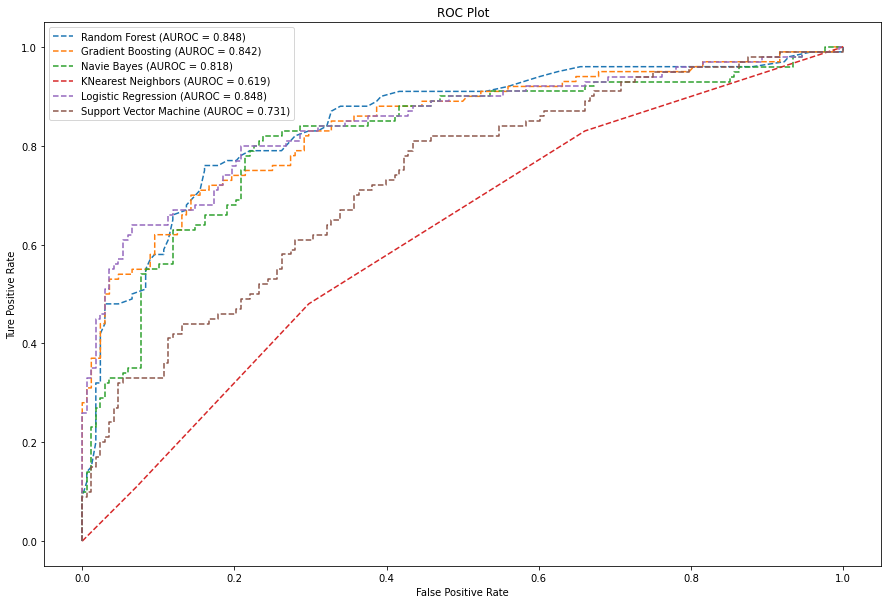

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(rf_fpr,rf_tpr, linestyle = '--', label='Random Forest (AUROC = %0.3f)' %rf_auc)
plt.plot(gb_fpr,gb_tpr, linestyle = '--', label='Gradient Boosting (AUROC = %0.3f)' %gb_auc)
plt.plot(nb_fpr,nb_tpr, linestyle = '--', label='Navie Bayes (AUROC = %0.3f)' %nb_auc)
plt.plot(knn_fpr,knn_tpr, linestyle = '--', label='KNearest Neighbors (AUROC = %0.3f)' %knn_auc)
plt.plot(lr_fpr,lr_tpr, linestyle = '--', label='Logistic Regression (AUROC = %0.3f)' %lr_auc)
plt.plot(sv_fpr,sv_tpr, linestyle = '--', label='Support Vector Machine (AUROC = %0.3f)' %sv_auc)

#Title
plt.title("ROC Plot")

# Axis Labels
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')

# Show Legend
plt.legend()
plt.show()

# Cross Validation

In [73]:
from sklearn.model_selection import cross_val_score #Package need to loaded for cross validation

In [74]:
cv_x = model_data2.iloc[:,1:28]
cv_y = model_data2.loc[:,"Survived"]

In [79]:
print(len(cv_x))
print(len(cv_y))
print(cv_x.shape)
print(cv_y.shape)
print(cv_x.columns)

891
891
(891, 27)
(891,)
Index(['Fare', 'Bloodpressure', 'Height(cm)', 'Weight(kg)', 'Pclass1',
       'Pclass2', 'Sex0', 'SibSp0', 'SibSp1', 'SibSp2', 'SibSp3', 'SibSp4',
       'SibSp5', 'Parch0', 'Parch1', 'Parch2', 'Parch3', 'Parch4', 'Parch5',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Continent1', 'Continent2',
       'Continent3', 'Continent4', 'Swiming0'],
      dtype='object')


In [80]:
# Decision Tree Cross Validation
from sklearn import tree
from sklearn.model_selection import cross_val_score
dt_model = tree.DecisionTreeClassifier()
print(cross_val_score(dt_model, cv_x, cv_y, cv=3, scoring ='accuracy').mean())

0.7239057239057239


In [81]:
# Random Forest Cross Validation
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
rf_model = ensemble.RandomForestClassifier(n_estimators=100)
print(cross_val_score(rf_model, cv_x, cv_y, cv=3, scoring ='accuracy').mean())

0.7777777777777778


In [82]:
# Gradient Boosting Cross Validation
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
gb_model = ensemble.GradientBoostingClassifier()
print(cross_val_score(gb_model, cv_x, cv_y, cv=3, scoring ='accuracy').mean())

0.7643097643097643


In [83]:
# Naive Bayes cross validation
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
nb_model = GaussianNB()
print(cross_val_score(nb_model, cv_x, cv_y, cv=3, scoring ='accuracy').mean())

0.41750841750841755


In [84]:
# K-nearest Neighbore cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_model = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(knn_model, cv_x, cv_y, cv=3, scoring ='accuracy').mean())

0.6184062850729518


In [85]:
# Logistic Regression cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr_model = LogisticRegression()
print(cross_val_score(lr_model, cv_x, cv_y, cv=3, scoring ='accuracy').mean())

0.7710437710437711


C:\Users\MY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [86]:
# Support vector machine cross validation
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
sv_model = SVC(probability = True)
print(cross_val_score(sv_model, cv_x, cv_y, cv=3, scoring ='accuracy').mean())

0.6554433221099888


In [87]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [88]:
rf_clf.predict([[26,0,169,86,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1]])

array([0], dtype=int64)

In [89]:
rf_clf.predict([[26,0,1609,86,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,1]])

array([1], dtype=int64)